In [1]:
import os
import os.path
import argparse
import h5py 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [2]:
# def my_rbf_kernel(X,Y):
def my_poly_kernel(X,Y):
	return (np.dot(X,Y.T)+1)**2
def my_poly_kernel1(X,Y):
	return (np.dot(X,Y.T)+1)**3
def my_linear_kernel(X,Y):
	return np.dot(X,Y.T)

In [35]:
filename = "data_1.h5"
file= h5py.File(filename,'r');
X=file['x'][:]
y=file['y'][:]
C=1.0
model= svm.SVC(kernel=my_poly_kernel,C=C)
model.fit(X,y)
X0,X1=X[:,0],X[:,1]
# xx,yy=make_meshgrid(X0,X1)	
x_min, x_max= X0.min() - 1, X0.max() + 1
y_min, y_max= X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))

Text(0.5, 1.0, 'SVM with kernel')

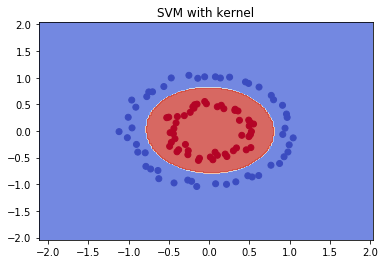

In [36]:
ker=model.kernel
spprt_vec=X[model.support_]
dual_coef=model.dual_coef_
intercpt=model.intercept_
X=np.c_[xx.ravel(),yy.ravel()]
predicted=np.dot(dual_coef,ker(spprt_vec,np.c_[xx.ravel(),yy.ravel()]))+intercpt
predicted=predicted>=0
predicted=predicted.astype(int)
Z=predicted.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8,linestyles=['--', '-', '--'])
plt.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm)
plt.title('SVM with kernel')

In [31]:
filename = "data_2.h5"
file= h5py.File(filename,'r');
X=file['x'][:]
y=file['y'][:]
C=1.0
model= svm.SVC(kernel=my_poly_kernel1,C=C)
model.fit(X,y)
X0,X1=X[:,0],X[:,1]
# xx,yy=make_meshgrid(X0,X1)	
x_min, x_max= X0.min() - 1, X0.max() + 1
y_min, y_max= X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))

Text(0, 0.5, 'Feature2')

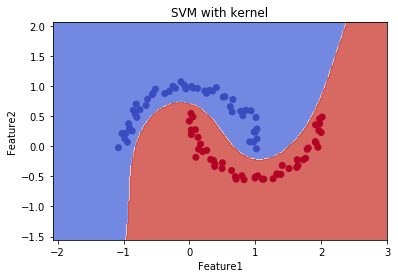

In [32]:
ker=model.kernel
spprt_vec=X[model.support_]
dual_coef=model.dual_coef_
intercpt=model.intercept_
X=np.c_[xx.ravel(),yy.ravel()]
predicted=np.dot(dual_coef,ker(spprt_vec,np.c_[xx.ravel(),yy.ravel()]))+intercpt
predicted=predicted>=0
predicted=predicted.astype(int)
Z=predicted.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm)
plt.title('SVM with kernel')
plt.xlabel("Feature1")
plt.ylabel("Feature2")

In [25]:
filename = "data_3.h5"
file= h5py.File(filename,'r');
X=file['x'][:]
y=file['y'][:]
C=1.0
model= svm.SVC(kernel=my_linear_kernel,C=C)
model=model.fit(X,y)
X0,X1=X[:,0],X[:,1]
# xx,yy=make_meshgrid(X0,X1)	
x_min, x_max= X0.min() - 1, X0.max() + 1
y_min, y_max= X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))


In [28]:
def oneVsrest(train_X,train_Y,test_X):
    n_classes=np.max(train_Y)+1
    print(n_classes)
    classified=np.zeros((len(test_X),n_classes))
    for i in range(n_classes):
        y1=np.where(train_Y==i,1,0)
        model=svm.SVC(kernel=my_linear_kernel)
        model.fit(train_X,y1)
        support_vectors=model.support_
        w=model.dual_coef_
        b=model.intercept_
        ker=model.kernel
        classified[:,i] = np.dot(w,ker(train_X[support_vectors],test_X))+b
    classified[classified<0]=0
    return np.argmax(classified,axis=1)

3


Text(0, 0.5, 'Feature2')

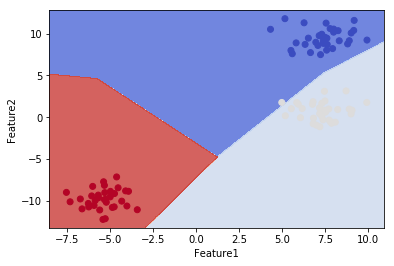

In [29]:
X_new=np.c_[xx.ravel(), yy.ravel()]
values = oneVsrest(X,y,X_new)
Z = values.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1,c=y, cmap=plt.cm.coolwarm)
plt.xlabel("Feature1")
plt.ylabel("Feature2")

In [10]:
filename = "data_4.h5"
file= h5py.File(filename,'r');
X=file['x'][:]
y=file['y'][:]
C=1.0
model= svm.SVC(kernel=my_poly_kernel,C=C)
model=model.fit(X,y)

In [11]:
ker=model.kernel
spprt_vec=X[model.support_]
dual_coef=model.dual_coef_
intercpt=model.intercept_

Text(0.5, 1.0, 'SVM with kernel')

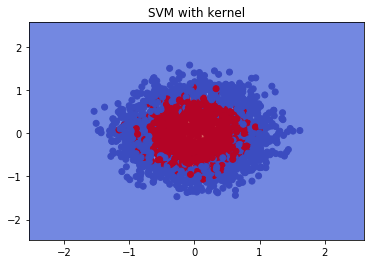

In [12]:
X0,X1=X[:,0],X[:,1]
# xx,yy=make_meshgrid(X0,X1)	
x_min, x_max= X0.min() - 1, X0.max() + 1
y_min, y_max= X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))
X=np.c_[xx.ravel(),yy.ravel()]
predicted=np.dot(dual_coef,ker(spprt_vec,np.c_[xx.ravel(),yy.ravel()]))+intercpt
predicted=predicted>=0
predicted=predicted.astype(int)
Z=predicted.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.8)
plt.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm)
plt.title('SVM with kernel')